In [35]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [37]:
kaggle competitions download -c sf-dst-scoring

SyntaxError: invalid syntax (<ipython-input-37-8708193e25bf>, line 1)

In [3]:
def get_boxplot(column):
    '''Makes a boxplot for the column'''
    fig, ax = plt.subplots(figsize = (5, 5))
    sns.boxplot(x='default', y=column, 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])])
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [4]:
df = pd.read_csv('train.csv')
df.head(15)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
5,41415,SCH,M,27,Y,N,0,1,0,1,1,15000,N,0
6,28436,SCH,M,39,N,N,0,0,0,1,2,28000,N,0
7,68769,SCH,F,39,N,N,0,0,1,2,3,45000,N,0
8,38424,SCH,F,50,Y,N,1,0,0,1,1,30000,N,0
9,4496,UGR,F,54,N,N,0,0,1,2,3,24000,N,0


<AxesSubplot:xlabel='default', ylabel='count'>

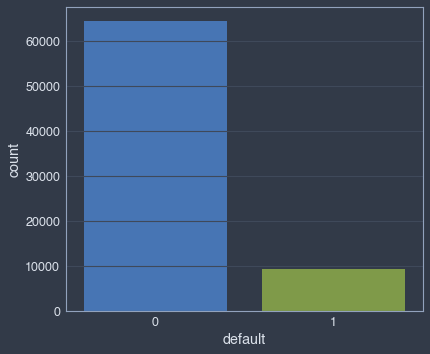

In [5]:
sns.countplot(x='default', data=df)

Клиентов без дефолта в 6 раз больше, можно сказать, что выборка несбалансированна. 

In [6]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

## Подготовка признаков

Сгруппирую признаки по типам

In [7]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

### Числовые признаки
    num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

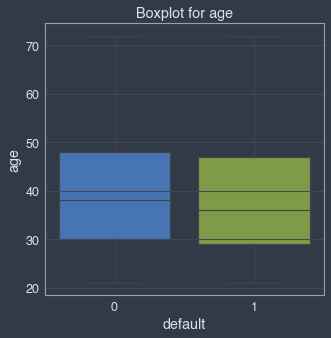

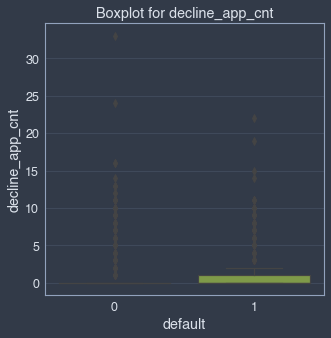

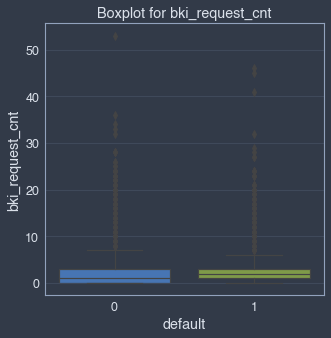

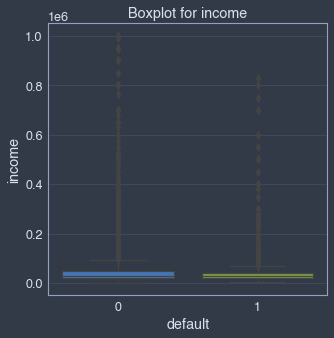

In [8]:
for col in num_cols: 
    get_boxplot(col)

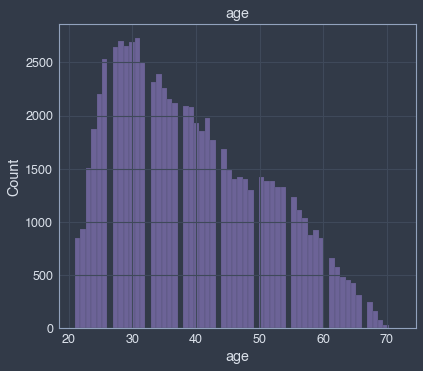

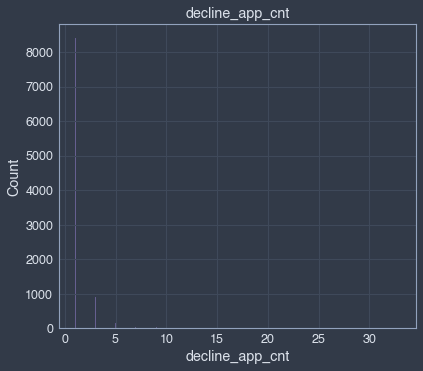

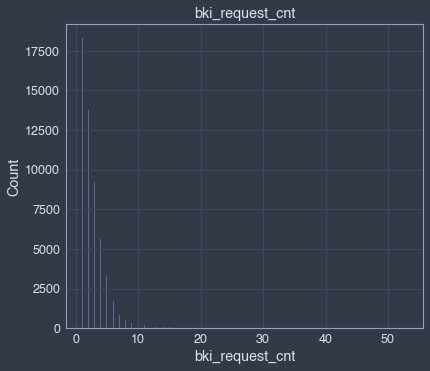

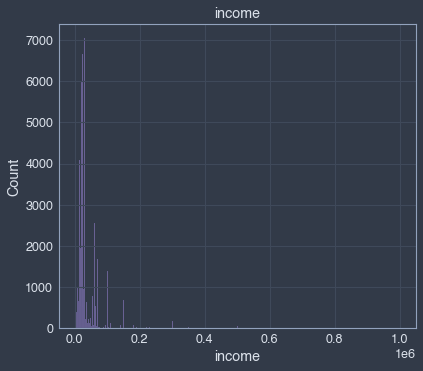

In [9]:
for i in num_cols:
    plt.figure()
    sns.histplot(df[i][df[i] > 0].dropna(), kde = False, color = 'm')
    plt.title(i)
    plt.show()

Логарифмирую числовые признаки чтобы привести распределение к нормальному

In [10]:
for i in num_cols:
    df[i] = df[i].apply(lambda x: np.log(x + 1))

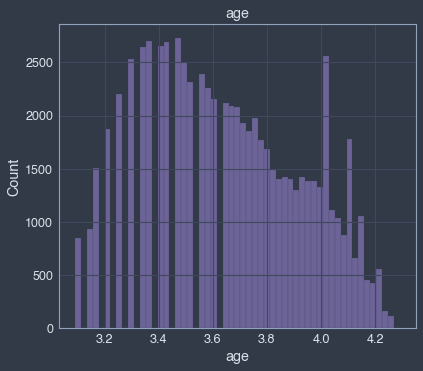

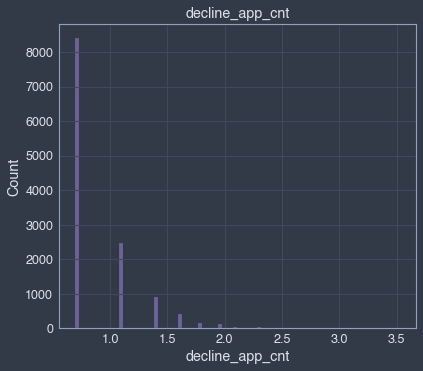

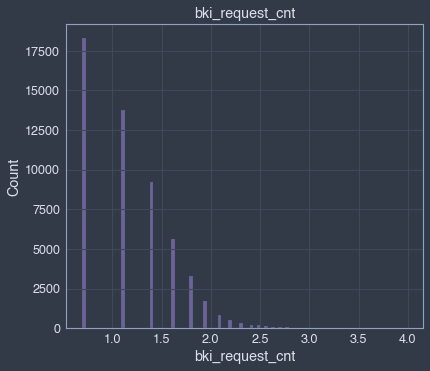

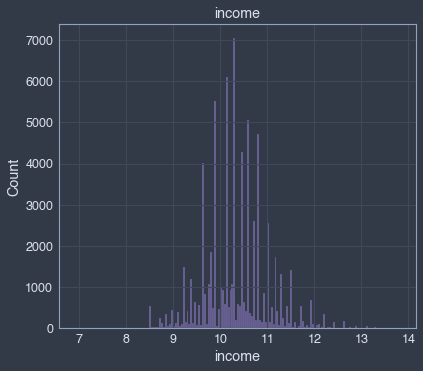

In [11]:
for i in num_cols:
    plt.figure()
    sns.histplot(df[i][df[i] > 0].dropna(), kde = False, color = 'm')
    plt.title(i)
    plt.show()

Оценка корреляции Пирсона

<AxesSubplot:>

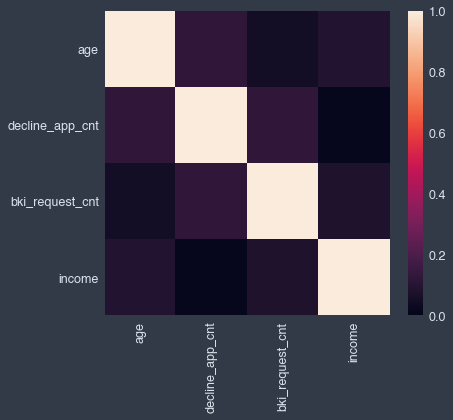

In [12]:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1)

Оценка значимости

<AxesSubplot:>

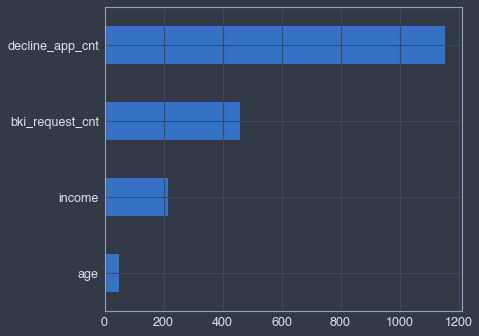

In [13]:
imp_num = Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [29]:
X_num = StandardScaler().fit_transform(df[num_cols].values)

### Бинарные признаки
    bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

Бинарные признаки привожу к значениям 0 / 1 

In [14]:
label_encoder = LabelEncoder()
for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])
    print(dict(enumerate(label_encoder.classes_)))
df.head()

{0: 'F', 1: 'M'}
{0: 'N', 1: 'Y'}
{0: 'N', 1: 'Y'}
{0: 'N', 1: 'Y'}
{0: 0, 1: 1}


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,4.143135,1,1,0.000000,0,0.693147,1,2,9.798183,0,0
1,63161,SCH,0,4.094345,0,0,0.000000,0,1.386294,2,3,9.852247,0,0
2,25887,SCH,1,3.258097,1,0,1.098612,0,0.693147,1,2,10.308986,1,0
3,16222,SCH,0,3.988984,0,0,0.000000,0,1.098612,2,3,9.210440,0,0
4,101655,GRD,1,3.891820,0,0,0.000000,1,0.693147,2,3,10.308986,1,0


### Категориальные признаки
    cat_cols = ['education', 'home_address', 'work_address']

<AxesSubplot:>

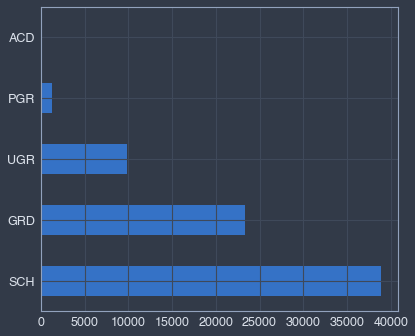

In [15]:
df['education'].value_counts().plot.barh()

Заполню пропуски в education новым значением unknown 

In [16]:
df['education'] = df['education'].fillna('unknown')

In [17]:
df['home_address'].value_counts()

2    39956
1    32585
3     1258
Name: home_address, dtype: int64

In [18]:
df['work_address'].value_counts()

3    44959
2    20506
1     8334
Name: work_address, dtype: int64

In [19]:
label_encoder.fit(df['education'])
df['education'] = label_encoder.transform(df['education'])
print(dict(enumerate(label_encoder.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR', 5: 'unknown'}


<AxesSubplot:>

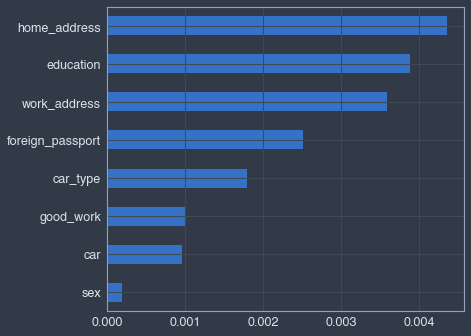

In [22]:
imp_cat = Series(mutual_info_classif(df[bin_cols + cat_cols], df['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Создам бинарные переменные для каждой категории

In [24]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [28]:
X_cat.shape

(73799, 12)

## Объединение признаков и обучение логистической регрессии

In [30]:
X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

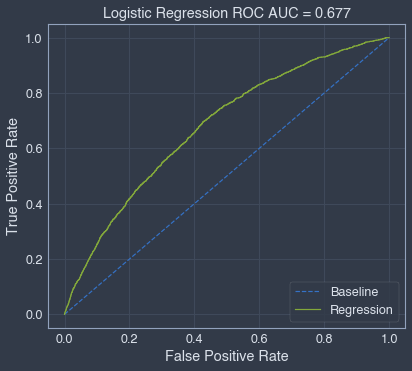

In [34]:
probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Регуляризация

In [36]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

Лучшее Penalty: l2
Лучшее C: 21.544346900318832
